# Исследование рынка компьютерных игр

В данном проекте мы будем рассматривать и анализировать индустрию компьютерных игр для разных платформ. Наша задача это прогнозирование успешности игр на основе имеющихся данных об играх до 2016 года. Наша цель это эффективное планирование рекламной компании для интерент-магазина на 2017 год. В нашем распоряжении есть информация об компьютерных играх - это название игры, платформа, год выпуска, жанр игры, продажи в разных частях света, оценка критиков, оценка пользователей и  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
from scipy import stats as st # импорт библиотеки scipy

In [2]:
df = pd.read_csv('/datasets/games.csv') # чтение файла с данными и сохранение в df

In [3]:
df.head() # получение первых 5 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Общая информация о датафрейме:**

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице одинадцать столбцов. Тип данных в столбцах: object, float64.

Согласно документации к данным:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод:**

В каждой строке таблицы - данные о компьютерных играх, всего в таблице одинадцать столбцов с типами данных object и float64. После изучения общей информации о таблице мы выяснили, что в столбцах встречаются пропуски, которые необходимо обработать. Данных в таблице достаточно, чтобы на их основе спрогнозировать успешность игр.

## Предобработка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [5]:
df.columns # перечень названий столбцов таблицы df

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названиях колонок есть нарушение стиля, изменим названия столбцов и приведем все к единому стилю, для этого нам просто нужно сделать все символы строчными.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns # проверим названия столбцов после их переименования 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Успех, все столбцы записаны в едином стиле, можно продолжать предобработку данных.

### Пропуски значений и замена типа данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [9]:
df.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски образовались в шести столбцах нашего датафрейма.

Для начала рассмотрим пропуски в столбце с жанром игр, там всего два пропуска.

In [10]:
df[df['genre'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры 1993 на одной игровой платформе GEN, также неизвестно название игр, чтобы ничего не терять можно заменить пропущенные значения в genre и name на 'unknown'.

In [11]:
df['genre'] = df['genre'].fillna('unknown') # замена пропущенных значений на unknown
df['name'] = df['name'].fillna('unknown')

In [12]:
df[['name','genre']].isna().sum() # подсчёт пропусков в столбце name и genre

name     0
genre    0
dtype: int64

В столбцах name и genre пропущенные значения успешно заменены на 'unknown'.

Избавимся от пропусков в столбце year_of_release, в наших данных таких пропусков не много около 2-ух процентов, чтобы не изобретать велосипед удалим строки с пропущенными значениями в year_of_release так мы мало чего потеряем, а данные будут более точными.

In [13]:
df.dropna(subset = ['year_of_release'], inplace=True) # удаление строк с пропущеными значениями в столбце year_of_release

In [14]:
df['year_of_release'].isna().sum() # подсчёт пропусков

0

После того как пропущеные значения в столбце year_of_release обработаны можно заменить их тип данных с float на int. Заменив тип данных мы ничего не потеряем, а процесс анализа данных будет эффективнее.

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int') # замена типа данных на int

Далее заполним пропуски в столбце rating. Столбец с этими данными - это рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [16]:
def my_mode(s):
    mode = s.mode()
    if len(mode) > 0:
        return mode[0]

In [17]:
df['rating'] = df['rating'].fillna('unknown')

In [18]:
df[df['name'].isin(['Duck Hunt', 'Pokemon Red/Pokemon Blue'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


Проверим как сработала наша функция и обработка пропусков в столбце raiting.

In [19]:
df.isna().sum() # подсчёт пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating                0
dtype: int64

Осталось два пропуска посмотрим эти строки.

In [20]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Это те самые две игры о которых почти ничего не известно, думаю, что можем избавиться от них.

In [21]:
df = df.query('genre != "unknown"') 

In [22]:
print('Пропусков в столбце rating:', df['rating'].isna().sum()) # подсчёт пропусков

Пропусков в столбце rating: 0


Успех, осталось два столбца с пропущенными значениями: critic_score и user_score.

In [23]:
df.groupby('genre')['critic_score'].median()

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.5
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

Предположу, что оценки критиков сильно зависят от жанра игр, на основе жанра игр заполним пропуски в critic_score.

In [24]:
df_transformed_critic_score = df.groupby('genre')['critic_score'].transform('median')
df['critic_score'] = df['critic_score'].fillna(df_transformed_critic_score)

In [25]:
df['critic_score'] = df['critic_score'].astype('int')

In [26]:
print('Пропусков в столбце critic_score:', df['critic_score'].isna().sum()) # подсчёт пропусков

Пропусков в столбце critic_score: 0


Успех в столбце critic_score нет пропусков, начнем заполнять пропуски user_score.

In [27]:
df['user_score'].unique() # смотрим уникальные значения в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score есть такие значения как nan и tbd, их необходимо обработать. Если с nan'ами все понятно, то что такое tbd надо узнать. Погуглив мы узнали, что значение 'tbd' - подлежит определению. Обработаем пропуски с помощию заглушки -2 предполагаю, что nan-ы это те же tbd, а значение tbd заменим на число 'заглушку' в качестве значения 'заглушки', будем использовать -1.

In [28]:
print('Количество значений "tbd" в столбце user_score:', len(df.query('user_score == "tbd"')))

Количество значений "tbd" в столбце user_score: 2376


In [29]:
df.loc[(df.user_score == 'tbd'), 'user_score'] = -1 # ставим значение заглушку

Готово, проверим уникальные значения столбца user_score.

In [30]:
df['user_score'].unique() # проверка уникальных значений в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -1, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [31]:
df['user_score'] = df['user_score'].astype('float') # замена типа данных в столбце user_score

Значение 'tbd' изменено, вместо него теперь стоит -1. Осталось заполнить пропуски.

In [32]:
df['user_score'] = df['user_score'].fillna(-2)

In [33]:
print('Количество пропущенных значений в столбце user_score:', df['user_score'].isna().sum())

Количество пропущенных значений в столбце user_score: 0


После заполнения пропусков user_score, можно проверить на сколкько обработан наш датафрейм.

In [34]:
df.isna().sum() # подсчёт пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Готово, пропущенные значения обработаны. Посмотрим на тип данных нашего датафрейма.

In [35]:
df.info() # получение общей информации df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Супер! Все как надо. Следуйший шаг это добавление столбца с общими продажами игр.

### Добавление столбца total_sales

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # добавление столбца total_sales

In [37]:
df.head() # смотрим как выглядит наш новый столбец 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,-2.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,-2.0,unknown,31.38


**Вывод:**

В данном этапе мы занимались предобработкой данных. В первую очередь мы привели все названия столбцов в датафрейме к единому стилю, далее мы занимались заполнением пропусков, пропуски были в 6 столбцах нашей таблицы, там где была необходимость делали "заглушки", например в случае с значениями tbd. Паралельно заменяли типы данных на более приемлемые. Конечным шагом этого этапа было добавление столбца total_sales в наш датафрейм в котором мы сложили все известные продажи по играм, этот столбец нам послужит для дальнейшего исследовательского анализа данных, которым мы будем заниматься в следующем этапе.

## Исследовательскй анализ данных

В этом шаге мы проведем исследовательский анализ данных. Для начала посмотрим, сколько игр выпускалось в разные годы. Для этого создадим переменную data_years и наполним его данными нашего датафрейма, сгруппигруем данные по годам и посмотрим общее количество выпущенных игр за каждый год.

In [38]:
data_years = df.groupby('year_of_release')['name'].count().reset_index()
data_years.rename(columns = {'year_of_release' : 'year', 'name' : 'number_of_games'}, inplace=True)
data_years['relative_expression'] = data_years['number_of_games'] / len(df) * 100 # смотрим относительную долю в процентах по общей структуре данных
display(data_years)

,year,number_of_games,relative_expression
0,1980,9,0.054731
1,1981,46,0.279737
2,1982,36,0.218925
3,1983,17,0.103381
4,1984,14,0.085137
5,1985,14,0.085137
6,1986,21,0.127706
7,1987,16,0.097300
8,1988,15,0.091219
9,1989,17,0.103381


По таблице видно, что в период с 1980 года по 1995 год было выпущенно не много игр в сумме 486 или всего 3 % от общего числа игр, определенно после 1995 года был прорыв в игровой индустрии.

Далее рассмотрим топ продаж по разным платформам.

In [39]:
data_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
display(data_platform)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


В топ 10 вошли такие платформы, как "PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS", также хочется добавить сюда перспетивную платформу, которая только набирала обороты - это "XOne".

In [40]:
top_platform_money = df.query('platform in ("PS2","X360","PS3","Wii","DS","PS","GBA","PS4","PSP","3DS","XOne") and year_of_release >= 1995')

In [41]:
top_platform_money.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11013,Riviera: The Promised Land,PSP,2006,Role-Playing,0.07,0.00,0.02,0.01,68,7.7,T,0.10
6335,One Piece Unlimited Cruise 1: The Treasure Ben...,Wii,2008,Adventure,0.00,0.07,0.19,0.01,66,-2.0,unknown,0.27
2856,Blur,PS3,2010,Racing,0.22,0.36,0.02,0.12,81,8.2,E10+,0.72
7349,MVP Baseball,PSP,2005,Sports,0.20,0.00,0.00,0.02,67,7.7,E,0.22
12026,GunParade Orchestra: Shiro no Shou,PS2,2006,Adventure,0.00,0.00,0.07,0.00,66,-2.0,unknown,0.07


Сделали датафрейм с актуальными топ-платформами, теперь можно смотреть общие продажи по этим платформам в динамике с 1995 года по 2016 год.

In [42]:
data_years_platform = top_platform_money.pivot_table(index='year_of_release', values='total_sales', columns = 'platform', aggfunc='sum')

In [43]:
data_years_platform

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,,
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,56.67,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN


Сделав сводную таблицу можно заметить кучу пропущенных значений - это нормально, потому что в определенные периоды игры перестали выходить на старых платформах, либо с выходом новых консоей на них только начинают появляться игры. Посмотрим визуально на эти данные.



<AxesSubplot:xlabel='year_of_release'>

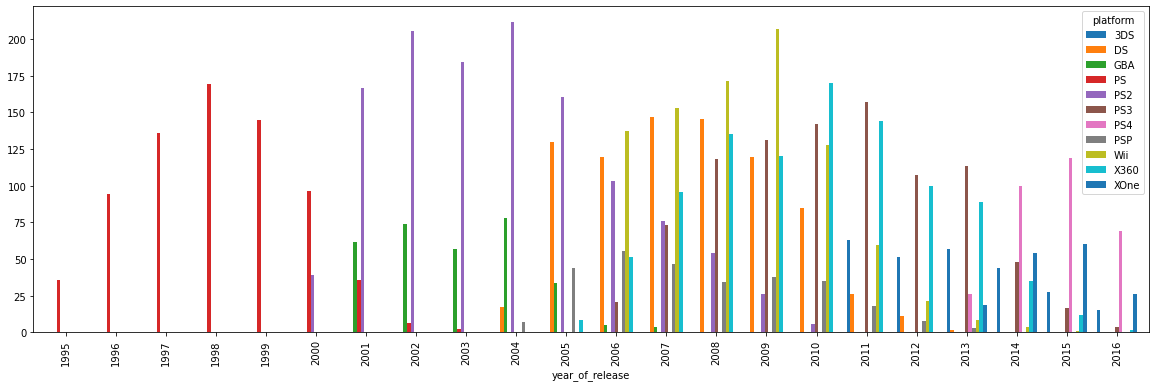

In [44]:
data_years_platform.plot(kind = 'bar', figsize = (20,6), width = .8)

**Делаем выводы:**
* Видно сменяемость консолей старого поколения от Sony на консоли нового поколения - они всегда были в топе, можно отметить, что переход с одного поколения на другой проходит примерно за 7-8 лет, актуальной консолью от Sony на 2016 год является PS4.
* Microsoft со своими XBox - это основоной конкурент Sony в последние деясть лет, тут также есть сменяемость поколений с XBox 360 на XBox One также переход с одного поколения на другое происходит в течении 7-8 лет, актуальной консолью от Microsoft на 2016 год является XBox One.
* У компании Nintendo - на протяжении анализируемого периода можем отметить такие консоли как: DS, Wii, GBA. Самой успешой консолью являлась Wii, также весомый успех на рынке показала консоль DS, актуальной на 2016 год является Wii, но с 2012 года происходит резкое падение продаж игр на данные консоли и поэтому стоит ждать выход следующей консоли от Nintendo, это будет разумно.

Выделим актуальные платформы:

In [45]:
actual = df.query('year_of_release >= 2012').groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

In [46]:
actual.sort_values(by=['platform','total_sales'], ascending=False)

,year_of_release,platform,total_sales
39,2015,XOne,60.14
29,2014,XOne,54.07
48,2016,XOne,26.15
19,2013,XOne,18.96
8,2012,X360,99.74
18,2013,X360,88.58
28,2014,X360,34.74
38,2015,X360,11.96
47,2016,X360,1.52
27,2014,WiiU,22.03


Видим рост что популярностью пользуются такие платформ как XOne, WiiU, PS4, 3DS.	

In [47]:
top_four_actual_platform = df.query('platform in ("PS4","WiiU","3DS","XOne")')

In [48]:
data_actual_platform = top_four_actual_platform.pivot_table(index='year_of_release', values='total_sales', columns = 'platform', aggfunc='sum')

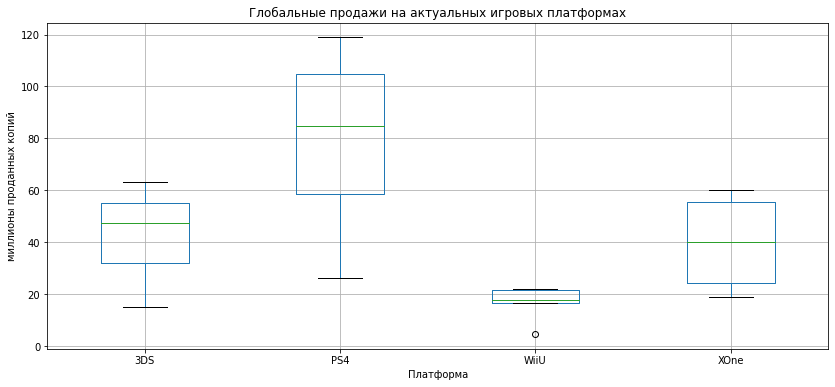

In [115]:
data_actual_platform.boxplot(figsize=(14,6))
plt.xlabel('Платформа')
plt.ylabel('миллионы проданных копий')
plt.title('Глобальные продажи на актуальных игровых платформах')
plt.show()

In [50]:
top_four_actual_platform.loc[top_four_actual_platform['platform'] == "PS4"].sort_values(by='total_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,-2.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [51]:
top_four_actual_platform.loc[top_four_actual_platform['platform'] == "XOne"].sort_values(by='total_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73,-2.0,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26


In [52]:
top_four_actual_platform.loc[top_four_actual_platform['platform'] == "WiiU"].sort_values(by='total_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84,8.1,E,5.23
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,72,-2.0,unknown,4.87


In [53]:
top_four_actual_platform.loc[top_four_actual_platform['platform'] == "3DS"].sort_values(by='total_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74,-2.0,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74,-2.0,unknown,11.68


Сони лидер, постепенно догоняет XOne, в топах игр по общим продажам на консолях можно увидеть одинаковые игры это:
* Call of Duty: Black Ops 3;
* Grand Theft Auto V;
* FIFA.


У приставок от Nintendo в топах серии игр от Марио и Пикачу 🏁.

**Вывод:**

В данном этапе мы проводили исследовательский анализ данных. Посмотрели на структуру выпущеных игр в динамике, определили когда произошел прорыв в игровой индустрии после которого рынок наполнился свежими играми, платформами и интересом со стороны пользователей. Также мы определили актуальные консоли, рассмотрели продажи игр по ним и узнали как долго живет одно поколение консолей.

Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве самой популярной платформы возьмем PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

**PS4 зависимость продаж от отзывыв пользователей и критиков.**

In [54]:
ps4 = df.query('platform == "PS4" and year_of_release >= 2012') # создание датафрейма с платформой PS4

In [55]:
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,-2.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73,-2.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


In [56]:
print('Таблица с данными PS4 готова. Строк в таблице:', len(ps4))

Таблица с данными PS4 готова. Строк в таблице: 392


Строим диаграмму рассеяния, посмотрим, как влияют на продажи оценки критиков.

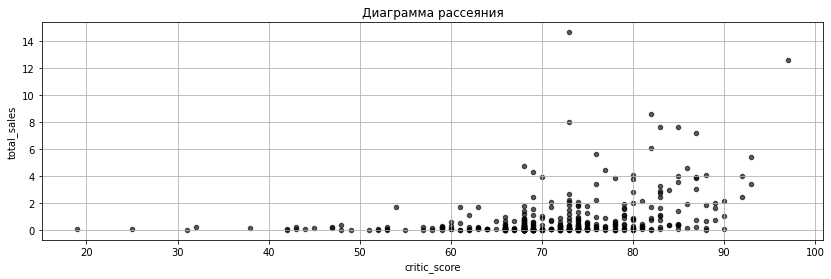

In [107]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, color = "black", figsize = (14,4), alpha = .65)
plt.title('Диаграмма рассеяния')
plt.show()

Мы видим, что на диаграмме рассеяния достаточно много игр с большими продажами в зависимости от оценки критиков обосновались в отметке от 68 до 97. 

Посмотрим на игры с самым высоким рейтингом критиков.

In [58]:
ps4.query('critic_score > 90').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.2,M,3.97
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93,8.2,M,3.42
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92,8.6,M,2.48


Думаю любители игр, наверняка сидели часами в этих играх, да и критикам очень по душе эти игры.

Посмотрим на самые большие продажи игр в нашем датафрейме и посмотрим глазами на оценки критиков.

In [59]:
ps4.query('total_sales > 6').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,-2.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73,-2.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08


На больших продажах результаты оценок критиков варьируют от 73 до 97 баллов, думаю, что эти оценки хорошие и большие продажи по этим играм обоснованы.

Строим диаграмму рассеяния, посмотрим, как влияют на продажи оценки пользователей. Помним, что у нас есть заглушка (-1), отсечем игры с этим значением и построим диаграмму рассеяния.

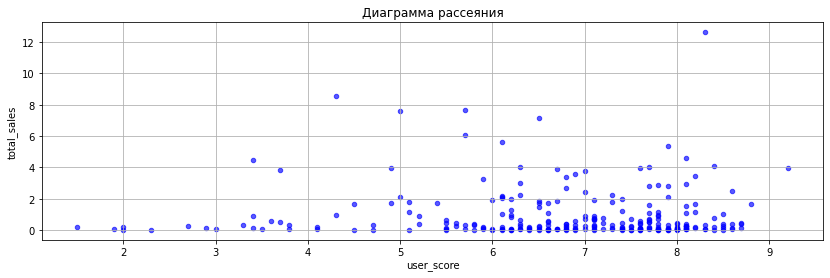

In [108]:
ps4.query('user_score >= 0').plot(x='user_score', y='total_sales', kind='scatter', grid=True, color = "blue", figsize = (14,4), alpha = .65)
plt.title('Диаграмма рассеяния')
plt.show()

На диаграмме рассеяния большинство игр с продажами от 3 млн.копий начинается с польовательской оценкой в 3,5 балла, думаю, что на презентации игр разработчики выкатили супер конфету с хорошей рекламой, а по факту релиза пользователи были уж очень разочарованы и поставили низкие оценки, примеров таких игр много и это огорчает, также в последнее время в классных играх может присутствовать или отсутствовать какая либо модная повестка, из за которой пользователи разных мировозрений могут занижать оценки.

Посмотрим на игры с самым высоким рейтингом пользователей.

In [61]:
ps4.query('user_score > 8').sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88,8.4,M,4.07
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.2,M,3.97
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93,8.2,M,3.42
481,Middle-Earth: Shadow of Mordor,PS4,2014,Action,1.01,1.43,0.05,0.47,84,8.1,M,2.96
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92,8.6,M,2.48
1097,Until Dawn,PS4,2015,Adventure,0.45,0.90,0.05,0.26,79,8.2,M,1.66
1107,Dark Souls III,PS4,2016,Role-Playing,0.65,0.45,0.34,0.22,89,8.8,M,1.66
1208,Wolfenstein: The New Order,PS4,2014,Shooter,0.47,0.80,0.03,0.24,79,8.1,M,1.54


Посмотрим на корреляцию параметров отзывов и общих продаж на PS4.

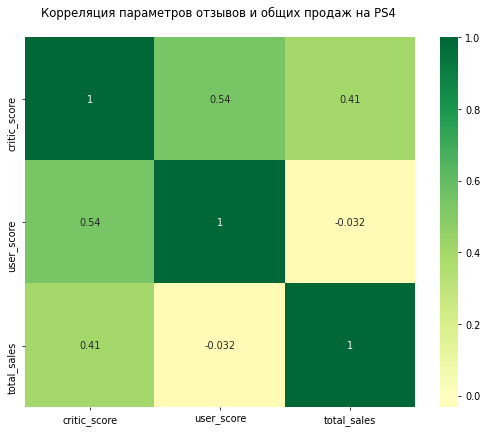

In [120]:
# Plot
plt.figure(figsize=(9,7), dpi= 70)
sns.heatmap(ps4[['critic_score', 'user_score', 'total_sales']].query('user_score > 0').corr(), xticklabels=ps4[['critic_score', 'user_score', 'total_sales']].corr().columns, yticklabels=ps4[['critic_score', 'user_score', 'total_sales']].corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция параметров отзывов и общих продаж на PS4 \n', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

По нашим выводам видно, что корреляция параметров между общими продажами и оцекой критиков прямая и оценки критиков определенно влияют на общие продажи, коэффициент корреляции между параметрами равен 0,41. Оценки пользователей почти не влияют на продажи в индустрии коэффициент корреляции составил -0.03 на платформе PS4.

Посмотрим на основного конкурента PS4:

**Корреляция параметров отзывов и общих продаж на XOne.**

In [63]:
xone = df.query('platform == "XOne" and year_of_release >= 2012') # создание датафрейма с платформой XOne

In [64]:
xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73,-2.0,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22


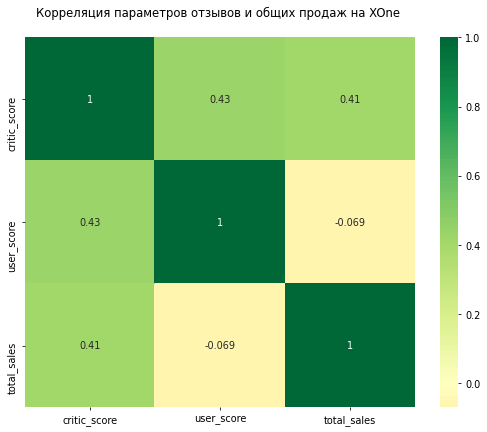

In [122]:
# Plot
plt.figure(figsize=(9,7), dpi= 70)
sns.heatmap(xone[['critic_score', 'user_score', 'total_sales']].query('user_score > 0').corr(), xticklabels=xone[['critic_score', 'user_score', 'total_sales']].corr().columns, yticklabels=xone[['critic_score', 'user_score', 'total_sales']].corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция параметров отзывов и общих продаж на XOne \n', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Точно такое же значение коэффициента корреляции между параметрами оценки критиков и общими продажами показали данные на платформе XOne, коэффициент корреляции между параметрами составил 0,41. Как и на PS4 похожая ситуация с оценками пользователей и общими продажами на платформе XOne, коэффициент корреляции между показателями составил -0.06.

**Актуальные платформы и корреляция по оценкам и общим продажам**

Выделим остальные платформы и посмотрим как дела обстоят у 3DS и Wiiu.

In [66]:
threeds_wiiu = df.query('platform in ("3DS","WiiU") and year_of_release >= 2012')

In [67]:
threeds_wiiu['platform'].value_counts()

3DS     396
WiiU    147
Name: platform, dtype: int64

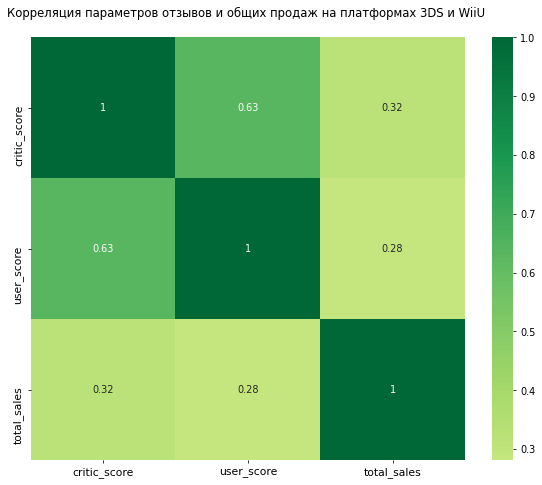

In [124]:
# Plot
plt.figure(figsize=(10,8), dpi= 70)
sns.heatmap(threeds_wiiu[['critic_score', 'user_score', 'total_sales']].query('user_score > 0').corr(), xticklabels=top_four_actual_platform[['critic_score', 'user_score', 'total_sales']].corr().columns, yticklabels=top_four_actual_platform[['critic_score', 'user_score', 'total_sales']].corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция параметров отзывов и общих продаж на платформах 3DS и WiiU \n', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

Общие продажи на актуальных платформах как и по предыдущим рассчетам показывают, что на продажи имеет прямое влияние параметр оценки критиков, коэффициент корреляции между параметрами составил 0.32, но помимо этого появилась прямая корреляция между параметрами оценки пользователей, показатель хоть и слабый, но положительный).

**Вывод:**

По итогам рассчетов можно сделать вывод, что прямое влияние на продажи оказывает параметр оценки критиков, на платформе PS4 коэффициент корреляции составил: 0.41, на Xone: 0.41, а на актуальных платформах от Нинтендо: 0.32. Также были построены диаграммы рассеяния, по которым мы смотрели как распределяются значения общих продаж и оценок пользователей и критиков по этой диаграмме тоже можно сделать вывод, что большие продажи связанны с высокими оценками, чего нельзя сказать о зависимости оценок пользователей и общих продаж.

Далее посмотрим на общее распределение игр по жанрам.

**Распределение игр по жанрам**

Посмотрим распределние игр по жанрам. Посмотрим на самые прибыльные жанры и на самые не прибыльные жанры.

In [69]:
genre_actual_time = df.query('year_of_release >= 2012').groupby('genre').agg({'genre':'count', 'total_sales': ['sum','mean']})

In [70]:
genre_actual_time.rename(columns={'genre':'count', 'sum':'sales_sum', 'mean':'sales_mean'}, inplace=True)

In [71]:
genre_actual_time.columns = genre_actual_time.columns.droplevel(level=0)
genre_actual_time

,count,sales_sum,sales_mean
genre,,,
Action,1031,441.12,0.427856
Adventure,302,29.43,0.097450
Fighting,109,44.49,0.408165
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Puzzle,28,4.89,0.174643
Racing,115,53.50,0.465217
Role-Playing,370,192.80,0.521081
Shooter,235,304.73,1.296723


По сгрупированной таблице с жанрами видно, что в тройке популярных жанров на актуальных платформах находятся такие жанры, как:
* Shooter - 235	игр;
* Platform - 85 игр;
* Sports - 268 игр.

Среди тройки самых не популярных жанров можно выделить:
* Strategy - 71	игры;
* Puzlle - 28 игр;
* Adventure - 302 игры;

Среди выпущенных игр чаще всего разработчики делали игры в жанре:
* Action - 1031 игра;
* Role-Playing - 370 игр;
* Adventure - 302 игры.

Среди игр редких жанров можно отметить:
* Simulation - 80 игр;
* Strategy - 71 игра;
* Puzlle - 28 игр.

**Вывод:**

Больше всего разработчики делали игры в жанре Action - 1031 игра была выпущенна под этим жанром, но если отталкиваться от продаж главное тут не количество, а качество. Так общих продаж в среднем на игру жанра Shooter приходиться около 1,3 млн, по этому показателю жанр Shooter лидирует, также в эту тройку вошли жанр Sports и Platform. Самыми не продаваемыми играми стали игры жанра Strategy, Simulation и Puzzle.

## Портрет пользователя каждого региона

В этом этапе нам необходимо определить самые популярные платформы (топ-5) для разных регионов (NA, EU, JP). Посмотреть на самые популярные жанры для разных регионов, посомтреть на их разницу между собой. Также посмотреть как влияет рейтинг ESRB на продажи в отдельном регионе?

Выделим актуальные платформы в разных регионах, посмотрим, что находиться в топе платформ и жанров игр в разных регионах.

**Анализ региона North America**

In [72]:
df_na = df.query('na_sales > 0 and year_of_release >= 2013') # создание таблицы с данными из Северной Америки

In [73]:
na_platforms = df_na.groupby('platform').agg({'platform':'count', 'na_sales':'sum'})
na_platforms['structure'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum()
na_platforms['structure'] = na_platforms['structure'].round(2)
na_platforms.sort_values(by = 'na_sales', ascending=False)

,platform,na_sales,structure
platform,,,
PS4,294,108.74,0.25
XOne,227,93.12,0.21
X360,170,81.66,0.19
PS3,211,63.50,0.15
3DS,119,38.20,0.09
WiiU,92,29.21,0.07
PC,84,11.11,0.03
Wii,14,6.56,0.01
PSV,94,5.04,0.01


Среди самых популярных платформ в Северной Америке располагаются:
* PS4 - 108.74 млн. продаж и 294 игры;
* XOne - 93.12 млн. продаж и 227 игр; 
* X360 - 81.66 млн. продаж и 170 игр;
* PS3 - 63.50 млн. продаж и 211 игр;
* 3DS - 38.20 млн. продаж и 119 игр.

Для Северной Америки гигаты индустрии PS4 и XOne идут почти бок о бок, но первое место все таки у Сони, продажи на эту платформу составляют 25 процентов от общей суммы продаж в Северной Америке. При этом у Сони значительно больше игр и платформа может похвастаться своими эксклюзивами.

*Посмотрим на самые популярные жанры игр в Северной Америке.*

In [74]:
na_genre = df_na.groupby('genre').agg({'genre':'count', 'na_sales':'sum'})
na_genre['structure'] = na_genre['na_sales'] / na_genre['na_sales'].sum()
na_genre['structure'] = na_genre['structure'].round(2) 
na_genre.sort_values(by = 'na_sales', ascending=False)

,genre,na_sales,structure
genre,,,
Action,442,126.05,0.29
Shooter,171,109.74,0.25
Sports,143,65.27,0.15
Role-Playing,158,46.40,0.11
Misc,84,27.49,0.06
Platform,67,18.14,0.04
Fighting,52,15.55,0.04
Racing,55,12.96,0.03
Adventure,80,7.14,0.02


В топ-5 жанров игр в Северной Америке вошли:
* Action;
* Shooter;
* Sports;
* Role-Playing;
* Misc.

Значительную долю в общей структуре продаж по жанрам в Северной Америке имеют жанры Action и Shooter (54 % от общего числа проданных игр в Северной Америке приходятся именно на эти жанры).

**Анализ региона Europe**

In [75]:
df_eu = df.query('eu_sales > 0 and year_of_release >= 2013')

In [76]:
eu_platforms = df_eu.groupby('platform').agg({'platform':'count', 'eu_sales':'sum'})
eu_platforms['structure'] = eu_platforms['eu_sales'] / eu_platforms['eu_sales'].sum()
eu_platforms['structure'] = eu_platforms['structure'].round(2) 
eu_platforms.sort_values(by = 'eu_sales', ascending=False)

,platform,eu_sales,structure
platform,,,
PS4,290,141.09,0.36
PS3,212,67.81,0.17
XOne,218,51.59,0.13
X360,169,42.52,0.11
3DS,122,30.96,0.08
PC,187,25.36,0.06
WiiU,96,19.85,0.05
PSV,96,6.10,0.02
Wii,22,5.93,0.02


Среди самых популярных платформ в Европе располагаются:
* PS4 - 141.09 млн. продаж и 290 игр;
* PS3 - 67.81 млн. продаж и 212 игр; 
* XOne - 51.59 млн. продаж и 218 игр;
* X360 - 42.52 млн. продаж и 169 игр;
* 3DS - 30.96 млн. продаж и 122 игры.

В отличии от Северной Америки в Европе сильно лидирует PS4 и даже PS3 обгоняет новый XOne. В общей структуре продаж игр на платформу PS4 в Европе пришлось 36 процентов продаж от общего. Приставка от Сони лидер в двух странах, посмотрим, как дела обстоят в Японии.

*Самые популярные жанры игр в Европе.*

In [77]:
eu_genre = df_eu.groupby('genre').agg({'genre':'count', 'eu_sales':'sum'})
eu_genre['structure'] = eu_genre['eu_sales'] / eu_genre['eu_sales'].sum()
eu_genre['structure'] = eu_genre['structure'].round(2) 
eu_genre.sort_values(by = 'eu_sales', ascending=False)

,genre,eu_sales,structure
genre,,,
Action,494,118.13,0.30
Shooter,171,87.86,0.22
Sports,169,60.52,0.15
Role-Playing,155,36.97,0.09
Racing,78,20.19,0.05
Misc,80,20.04,0.05
Platform,62,15.58,0.04
Simulation,44,10.92,0.03
Fighting,49,8.55,0.02


В топ-5 жанров игр в Европе вошли:
* Action;
* Shooter;
* Sports;
* Role-Playing;
* Racing.

Распределение жанров в Европе очень похоже на распределение жанров в Северной Америке, но есть единственное отличие пятый по популярности жанр в Европе - это Racing, в Америке эту строчку занимает жанр Misc. 

Значительную долю в общей структуре продаж по жанрам в Европе имеют жанры Action и Shooter (52 % от общего числа проданных игр в Европе приходятся именно на эти жанры).

**Анализ региона Japan**

In [78]:
df_jp = df.query('jp_sales > 0 and year_of_release >= 2013')

In [79]:
jp_platforms = df_jp.groupby('platform').agg({'platform':'count', 'jp_sales':'sum'})
jp_platforms['structure'] = jp_platforms['jp_sales'] / jp_platforms['jp_sales'].sum()
jp_platforms['structure'] = jp_platforms['structure'].round(2) 
jp_platforms.sort_values(by = 'jp_sales', ascending=False)

,platform,jp_sales,structure
platform,,,
3DS,235,67.81,0.48
PS3,236,23.35,0.17
PSV,316,18.59,0.13
PS4,223,15.96,0.11
WiiU,57,10.88,0.08
PSP,66,3.29,0.02
X360,31,0.51,0.00
XOne,22,0.34,0.00
Wii,1,0.05,0.00


Среди самых популярных платформ в Японии располагаются:
* 3DS - 67.81 млн. продаж и 235 игр;
* PS3 - 23.35 млн. продаж и 236 игр; 
* PSV - 18.59 млн. продаж и 316 игр;
* PS4 - 15.96 млн. продаж и 223 игры;
* WiiU - 10.88 млн. продаж и 57 игр.

В Японии в отличии от других регионов на первом месте 3DS от Nintendo, PS3 и забытая PSvita, а лидер других регионов всего лишь на четвортом месте. Что касается Xbox можно сказать, что новое и старое поколение не пользуется популярностью у Японцев.

*Посмотрим на самые популярные жанры игр в Японии.*

In [80]:
jp_genre = df_jp.groupby('genre').agg({'genre':'count', 'jp_sales':'sum'})
jp_genre['structure'] = jp_genre['jp_sales'] / jp_genre['jp_sales'].sum()
jp_genre['structure'] = jp_genre['structure'].round(2) 
jp_genre.sort_values(by = 'jp_sales', ascending=False)

,genre,jp_sales,structure
genre,,,
Role-Playing,236,51.04,0.36
Action,400,40.49,0.29
Misc,90,9.20,0.07
Fighting,59,7.65,0.05
Shooter,69,6.61,0.05
Adventure,165,5.82,0.04
Sports,60,5.41,0.04
Platform,28,4.79,0.03
Simulation,21,4.52,0.03


В топ-5 жанров игр в Японии вошли:
* Role-Playing;
* Action;
* Misc;
* Fighting;
* Shooter.

Распределение жанров в Японии не похоже ни на один другой регион, здесь первое место занимает жанр Role-Playing, а также в отличии от других регионов в топ записался жанр Fighting. 

**Вывод:**

На данном этапе мы посмотрели и выделили пятерки самых популярных игровых платформ для разных регионов, так для Северной Америки продажи на платформах PS4 и XOne имеют на двоих более 200 млн. продаж копий. Продажи на PS4 составляют 25 процентов от общей суммы продаж в Северной Америке. В отличии от Северной Америки в Европе сильно лидирует PS4 в общей структуре продаж игр на платформу PS4 в Европе пришлось 36 процентов продаж от общего. Исторически отличились в Японии, в от Америки и Европы на первом месте 3DS от Nintendo, а PS4 который был на первом месте рейтинга других регионов расположился на четвертом месте всего лишь с 15.96 млн. продаж. Что касается Xbox можно сказать, что новое и старое поколение не пользуется популярностью у Японцев и игр на двух поколениях очень мало всего 53 и продажи менее 1 млн. копий. Что касается жанров в Европе и Америке распределение в топе похоже друг на друга, но Японци и здесь отличились - не любят жанр Sports, но Role-Playing на первом месте, весьма интересно.

**Влияние рейтинга ESRB на разные регионы**

Посмотрим какие рейтинги ESRB бывают.

In [81]:
df['rating'].unique() # смотрим уникальные значения в столбце rating

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [82]:
df['rating'].value_counts() # посчет значений 

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Лидер рейтинга ESRB - это рейтинг E. Расшифруем все рейтинги:
* E - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет;
* T - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
* M - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;
* E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»;
* EC - («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет;
* RP - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга;
* K-A - («Kids to Adults») — первоначально рейтинг E, этот рейтинг изменим на рейтинг E;
* AO - («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

Заменим рейтинг K-A на рейтинг E.

In [83]:
df.loc[(df.rating == 'K-A'), 'rating'] = "E" # замена значения рейтинга

In [84]:
df['rating'].value_counts()

unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
AO            1
RP            1
Name: rating, dtype: int64

**Влияние рейтинга ESRB на продажи в Северной Америке**

In [85]:
esrb_na = df_na.groupby('rating').agg({'name':'count', 'na_sales':'sum'})
esrb_na.rename(columns={'name':'game'}, inplace=True)
esrb_na['structure'] = esrb_na['na_sales'] / esrb_na['na_sales'].sum()
esrb_na['structure'] = esrb_na['structure'].round(2)
esrb_na.sort_values(by='na_sales', ascending=False)

,game,na_sales,structure
rating,,,
M,334,165.21,0.38
unknown,298,89.42,0.20
E,217,79.05,0.18
E10+,220,54.24,0.12
T,240,49.79,0.11


В Северной Америке с большим отрывом лидирует рейтинг "M", 38 процентов от общего числа продаж в Северной Америке, второе место занимает неизвестный-неопределенный рейтинг под грифом unknown, каждая пятая проданная игра - это игра с неопределенным рейтингом, шок. А рейтинг "E" с 18 процентами от общего числа продаж занимает третью строчку.

**Влияние рейтинга ESRB на продажи в Европе**

In [86]:
esrb_eu = df_eu.groupby('rating').agg({'name':'count', 'eu_sales':'sum'})
esrb_eu.rename(columns={'name':'game'}, inplace=True)
esrb_eu['structure'] = esrb_eu['eu_sales'] / esrb_eu['eu_sales'].sum()
esrb_eu['structure'] = esrb_eu['structure'].round(2)
esrb_eu.sort_values(by='eu_sales', ascending=False)

,game,eu_sales,structure
rating,,,
M,337,145.32,0.37
E,265,83.36,0.21
unknown,336,78.91,0.20
E10+,231,42.69,0.11
T,253,41.95,0.11


В Европе такое же расположение рейтингов как и в Северной Америке. Первое место по продажам занимает рейтинг "M", 37 процентов от общего числа продаж, второе место рейтинг "E" с 21 процентами от общего числа продаж и  20 процентов от общего числа продаж в Европе игры с неизвестным рейтином.

**Влияние рейтинга ESRB на продажи в Японии**

In [87]:
esrb_jp = df_jp.groupby('rating').agg({'name':'count', 'jp_sales':'sum'})
esrb_jp.rename(columns={'name':'game'}, inplace=True)
esrb_jp['structure'] = esrb_jp['jp_sales'] / esrb_jp['jp_sales'].sum()
esrb_jp['structure'] = esrb_jp['structure'].round(2)
esrb_jp.sort_values(by='jp_sales', ascending=False)

,game,jp_sales,structure
rating,,,
unknown,712,85.05,0.60
T,181,20.59,0.15
E,77,15.14,0.11
M,159,14.11,0.10
E10+,58,5.89,0.04


В Японии в отличии от других регионов дела обстоят иначе. Первое место занимет рейтинг "unknown", 60 процентов от общего числа продаж - японцы всегда любили неизвестные миру игры и рейтинги). Второе место занимает рейтинг "Т" с 15 процентами от общих продаж, а рейтинг "М", который был на первом месте в других регионах занял почти последнее место и у него всего 10 процентов от общего числа продаж в Японии.

**Вывод:**

В Северной Америке с большим отрывом лидирует рейтинг "M", 38 процентов от общего числа продаж в Северной Америке, второе место - это игры с неизвестным рейтингом с 20 процентами от общего числа продаж.
В Европе похожее расположение рейтингов как и в Северной Америке. Первое место по продажам занимает рейтинг "M", 37 процентов от общего числа продаж, второе место рейтинг "E" с 21 процентами от общего числа продаж.
В Японии в отличии от других регионов дела обстоят иначе. Первое место занимет неопределенный рейтинг "unknown", 60 процентов от общего числа продаж. Второе место занимает рейтинг "T" с 15 процентами от общих продаж, а рейтинг "М", который был на первом месте в других регионах занял четвертое место и у него 10 процентов от общего числа продаж в Японии.

## Проверка гипотиз

На данном этапе необходимо проверить две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [88]:
df_xone = df.query('platform == "XOne" and user_score > 0 and year_of_release >= 2012') # данные с платформой XOne 

In [89]:
df_xone.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49


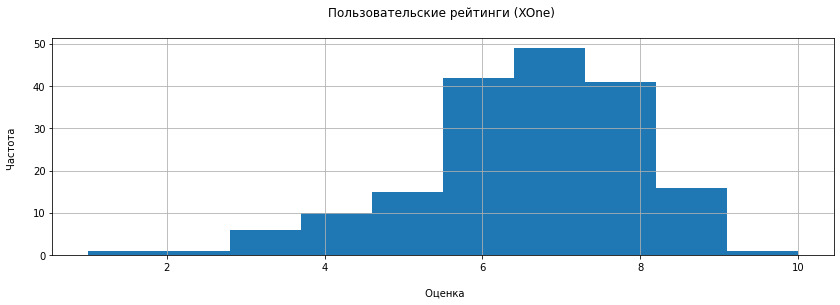

In [110]:
df_xone.hist('user_score', bins=10, range=(1, 10), figsize=(14,4)) # строим гистограмму по оценкам пользователей XOne
plt.xlabel('\n Оценка')
plt.ylabel('Частота \n')
plt.title('Пользовательские рейтинги (XOne) \n')
plt.show()

Посмотрим на среднее значение оценок пользователей на платформе XOne:

In [91]:
print('Средняя оценка пользователей на платформе XOne:', df_xone['user_score'].mean().round(2))

Средняя оценка пользователей на платформе XOne: 6.52


In [92]:
df_xone['user_score'].median().round(2) # смотрим на показатель медианы

6.8

Рейтинг выше среднего, хотя думал что будет больше, видимо из-за тяжелого хвоста средняя оценка пользователей оказалась не такой большой. Показатель медианы составил 6.8 уже вперед). Далее проделаем такую же магию с играми на PC.

In [93]:
df_pc = df.query('platform == "PC" and user_score > 0 and year_of_release >= 2012') # данные с платформой PC

In [94]:
df_pc.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88,4.0,M,5.14
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90,7.9,T,2.30


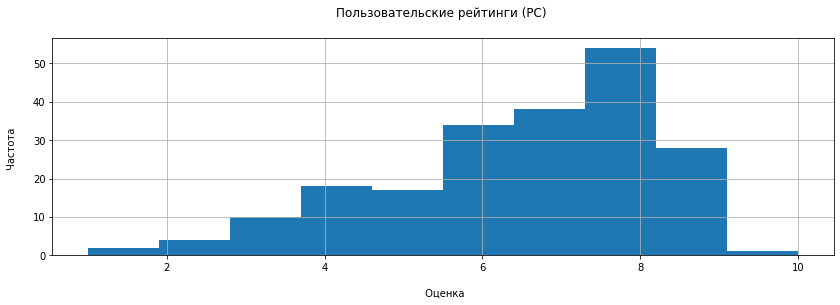

In [112]:
df_pc.hist('user_score', bins=10, range=(1, 10), figsize=(14,4)) # строим гистограмму по оценкам пользователей PC
plt.xlabel('\n Оценка')
plt.ylabel('Частота \n')
plt.title('Пользовательские рейтинги (PC) \n')
plt.show()

Посмотрим на среднее значение оценок пользователей на платформе PC:

In [96]:
print('Средняя оценка пользователей на платформе PC:', df_pc['user_score'].mean().round(2))

Средняя оценка пользователей на платформе PC: 6.43


In [97]:
df_pc['user_score'].median().round(2) # смотрим на показатель медианы

6.8

Видим что средний рейтинг пользователей на платформе PC составил: 6.43, показатель медианы составил: 6.8

*Сформируем гипотезы:*

* H0 - средние пользовательские рейтинги платформ Xbox One и PC не различаются;
* H1 - средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [98]:
sample_1 = df_xone['user_score']
sample_2 = df_pc['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC не различаются')
else:
    print('Не отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC не различаются')

p-значение:  0.5489537965134912
Не отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC не различаются


Полученное значение p-value говорит о том, что хотя средние оценки пользователей этих платформ неодинаковы, с вероятностью в почти 55% такое или большее различие можно получить случайно. Это явно большая вероятность, чтобы делать вывод о значимом различии между средними оценками на PC и XOne.

**Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Для начала соберем данные по жанру action и sports, не забудем про заглушки в столбце user_score (-1).

In [99]:
df_action = df.query('genre == "Action" and user_score > 0')
df_sports = df.query('genre == "Sports" and user_score > 0')

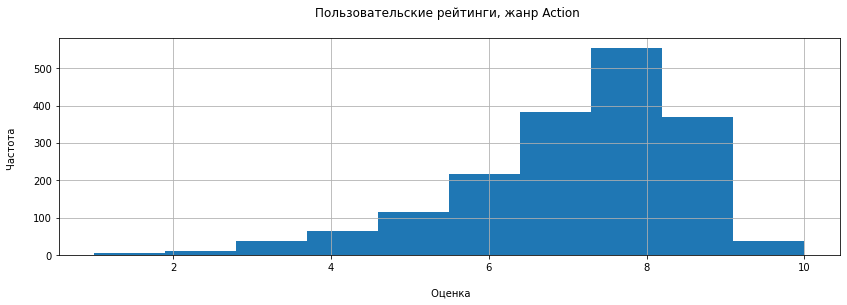

In [113]:
df_action.hist('user_score', bins=10, range=(1, 10), figsize=(14,4)) # строим гистограмму по оценкам пользователей XOne
plt.xlabel('\n Оценка')
plt.ylabel('Частота \n')
plt.title('Пользовательские рейтинги, жанр Action \n')
plt.show()

Посмотрим на среднее значение оценок пользователей жанра Action:

In [101]:
print('Средняя оценка пользователей жанра Action:', df_action['user_score'].mean().round(2))

Средняя оценка пользователей жанра Action: 7.06


In [102]:
df_action['user_score'].median().round(2) # смотрим на показатель медианы

7.4

Повторим действия с жанром Sports.

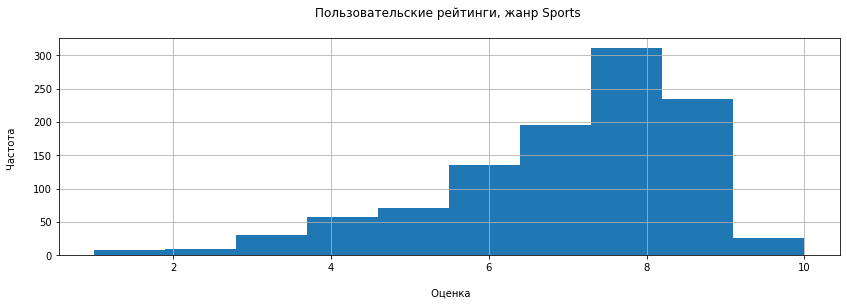

In [114]:
df_sports.hist('user_score', bins=10, range=(1, 10), figsize=(14,4)) # строим гистограмму по оценкам пользователей XOne
plt.xlabel('\n Оценка')
plt.ylabel('Частота \n')
plt.title('Пользовательские рейтинги, жанр Sports \n')
plt.show()

In [104]:
print('Средняя оценка пользователей жанра Sports:', df_sports['user_score'].mean().round(2))

Средняя оценка пользователей жанра Sports: 6.95


In [105]:
df_sports['user_score'].median().round(2) # смотрим на показатель медианы

7.4

На первый взгляд показатели достаточно приближены друг к другу.

*Сформируем гипотезы:*

* H0 - средние пользовательские рейтинги жанров Action и Sports не различаются;
* H1 - средние пользовательские рейтинги жанров Action и Sports различаются;

In [106]:
sample_1 = df_action['user_score']
sample_2 = df_sports['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports не различаются')
else:
    print('Не отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports не различаются')

p-значение:  0.07370217419278526
Не отвергаем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports не различаются


**Интерпретация результата:**

* Полученное значение p-value говорит о том, что хотя средние оценки пользователей по этим жанрам неодинаковы, с вероятностью в почти 7% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками этих жанров.


**Вывод:**

На данном этапе мы проверяли две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Также рассмотрели средние оценки пользователей на платформах PC и XBox One, и средние оценки пользователей по жанрам Action и Sports. Посомтрели на оценки наглядно и сравнили их между собой, сформулировали основные и альтернативные гипотезы и проверили их.

# Общий вывод

В данном проекте мы рассмотрели индустрию компьютерных игр для разных платформ и провели анализ успешности игр для интернет-магазина. 

Для анализа нам были представлены основные данные игр с 1980 по 2016 год. С исходными данными мы провели необходимые манипуляции для успешного анализа, конкретно мы поработали с самим качеством данных изменили типы данных, изменили заголовки (привели к единому стилю) и заполнили пропуски, которые были в 6 столбцах нашей таблицы, там где была необходимость делали "заглушки", например в случае с значениями tbd. Для дальнейшего анализа добавили столбец total_sales в наш датафрейм в котором мы сложили все известные продажи по играм в разных регионах.

В проекте было исследование выпуска игр в динамике где были сделаны определенные выводы:
* В период с 1980 года по 1995 год было выпущенно не много игр в сумме 486 или всего 3 % от общего числа игр;
* После 1995 года был прорыв в игровой индустрии и игры начали наиболее активно разрабатывать и продавать.

Определив, что с 1995 года произошел прорыв в индустрии, мы взялись за анализ продаж по разным платформам и определили топ-10 платформ. В топ-10 вошли такие платформы, как  "PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS", также мы добавили в топ перспетивную платформу, которая только набирала обороты - это "XOne". Далее мы рассмотрели показатели продаж по этим платформам и выделили наиболее перспективные, помимо этого мы определили, что в рамках одной компании (Sony или Microsoft) переход с одного поколения на другой проходит примерно за 7-8 лет, так произошло с PS3, PS4 и Xbox360, XboxOne. На 2016 год платформой-лидером по показателю итоговых продаж игр стала платформа PS4. Самыми продаваемыми играми на этой консоли стали:
* Call of Duty: Black Ops 3 - 14.63 млн. продаж на PS4;
* Grand Theft Auto V - 12.62 млн. продаж на PS4;
* FIFA 16 - 8.58 млн. продаж на PS4.

Также была расссмотрена зависимость между продажами и оценками критиков и пользователей, построена диаграмма рассеянея. Если между оценками критиков и продажами мы увидели закономерность выше оценки - больше продажи, то с оценками пользователей на диаграмме рассеяния большинство игр с продажами от 3 млн.копий начинается с польовательской оценкой в 3,5 балла, думаю, что на презентации игр разработчики выкатили супер конфету с хорошей рекламой, а по факту релиза пользователи были уж очень разочарованы и поставили низкие оценки, примеров таких игр много и это огорчает, также в последнее время в классных играх может присутствовать или отсутствовать какая либо модная повестка, из за которой пользователи разных мировозрений могут занижать оценки.

В ходе проекта были выделены самые популярные и продаваемые жанры игр, таковыми оказались жанры:
* Shooter - 235	игр;
* Platform - 85 игр;
* Sports - 268 игр.

В среднем на одну игру этого жанра приходилось больше всего продаж.

Среди тройки самых не популярных жанров можно выделить:
* Strategy - 71	игры;
* Puzlle - 28 игр;
* Adventure - 302 игры.

В среднем на одну игру этого жанра приходилось меньше всего продаж.

Было выявлено, что Для Северной Америки гигаты индустрии PS4 и XOne идут почти бок о бок, но первое место все таки у Сони, продажи на эту платформу составляют 25 процентов от общей суммы продаж в Северной Америке.
В отличии от Северной Америки в Европе сильно лидирует PS4 и даже PS3 обгоняет новый XOne. В общей структуре продаж игр на платформу PS4 в Европе пришлось 36 процентов продаж от общего.
В Японии в отличии от других регионов на первом месте 3DS от Nintendo, PS3 и забытая PSvita, а лидер других регионов всего лишь на четвертом месте. Что касается Xbox можно сказать, что новое и старое поколение не пользуется популярностью у Японцев.
Также оценив продажи по разным жанрам в Европе и Америке распределение в топе похоже друг на друга, но Японци и здесь отличились - не любят жанр Sports, но Role-Playing на первом месте, весьма интересно. Помимо этого мы провели оценку продаж игр  по рейтингу ESRB если в Северной Америке и Европе с большим отрывом лидирует рейтинг "M", то в Японии с огромной разницей первое место по продажам занимет рейтинг "unknown", 60 процентов от общего числа продаж, а рейтинг "М", который был на первом месте в других регионах занял четвертое место и у него 10 процентов от общего числа продаж в Японии.

Также мы проверили две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Результат расчетов с выводами о проверке гипотез находится в Шаге № 5 "Проверка гипотез".